In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.


The raw image is available in spicy.misc package with the name face.


Hint:
    
    
import numpy as np
from sklearn import cluster, datasets
from scipy import misc

### Image compression by clustering

#### 1. Image is first converted into 3D array and then 2D array.
#### 2. This 2D array is then fed to cluster model to predict centroids of classes
#### 3. Now a dummy 2D array with same dimension as of image 2D array is created 
#### 4. Now, values of actual 2D array are replaced with centroid values to which they belong.
#### 5. This new 2D array is then converted into 3D array and then image.
#### 6. This new image is compressed and is of less size then original image

In [159]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn import cluster, datasets
from scipy import misc

In [160]:
image = misc.face()

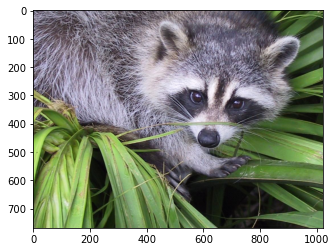

In [161]:
plt.imshow(image)

In [162]:
image_3Dnp = np.asarray(image)
# converting image to numpy array
img = image_3Dnp.copy()

In [163]:
image_3Dnp.shape 
#image is now converted into 3D array

(768, 1024, 3)

In [164]:
image_3Dnp

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

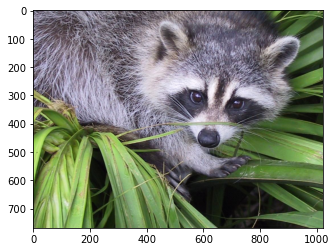

In [165]:
plt.imshow(image_3Dnp)
# displaying this np array as image

In [166]:
#converting this three dimensional array to 2 dimentional array, as algorithm will take 2D array as input
image_2Dnp = image_np.reshape(image_np.shape[0]*image_np.shape[1],3)

In [167]:
image_2Dnp.shape
# 3D numpy array is now converted into 2D numpy array

(786432, 3)

In [168]:
from sklearn.cluster import KMeans

In [223]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [224]:
# feeding 2D array to modle for centroids prediction
kmeans.fit(image_2Dnp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [225]:
lables_for_rows = kmeans.predict(image_2Dnp)

In [226]:
lables_for_rows
# Below are the predicted labels for each rows or predicted clusters for each rows

array([0, 1, 1, ..., 0, 0, 0])

In [227]:
lables_for_rows.shape

(786432,)

In [228]:
# Converting these lables into the original dimensions of the image
lables = lables.reshape(image.shape[0], image.shape[1])

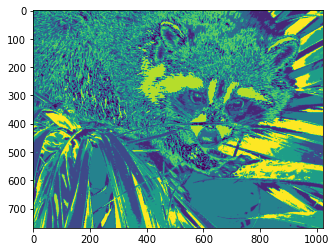

In [229]:
plt.imshow(lables)
# plotting lables of each clusters

Now, Lets plot the centroids, instead of lables

In [230]:
pixel_centroids = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

In [231]:
# creating a dummy 3D array
dummy = np.zeros((image_2Dnp.shape))

In [232]:
dummy.shape

(786432, 3)

In [233]:
pixel_centroids.shape

(786432,)

In [234]:
cluster_centers.shape

(5, 3)

In [235]:
#Converting the pixels back to the shape 786432 with values for each cluster = cluster centers
for cluster_no in range(2):
    dummy[pixel_centroids==cluster_no] = cluster_centers[cluster_no]
dummy[0:5]

array([[113.25272806, 122.62648877, 102.42226458],
       [155.62483272, 165.88422808, 140.28925975],
       [155.62483272, 165.88422808, 140.28925975],
       [155.62483272, 165.88422808, 140.28925975],
       [155.62483272, 165.88422808, 140.28925975]])

In [236]:
compressed_image_3Dnp = dummy.reshape((img.shape))

In [237]:
img.shape, compressed_image_3Dnp.shape

((768, 1024, 3), (768, 1024, 3))

In [238]:
compressed_image = Image.fromarray(np.uint8(compressed_image_3Dnp))

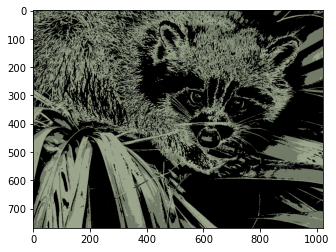

In [239]:
plt.imshow(compressed_image)

Text(0.5, 1.0, 'Compressed Image')

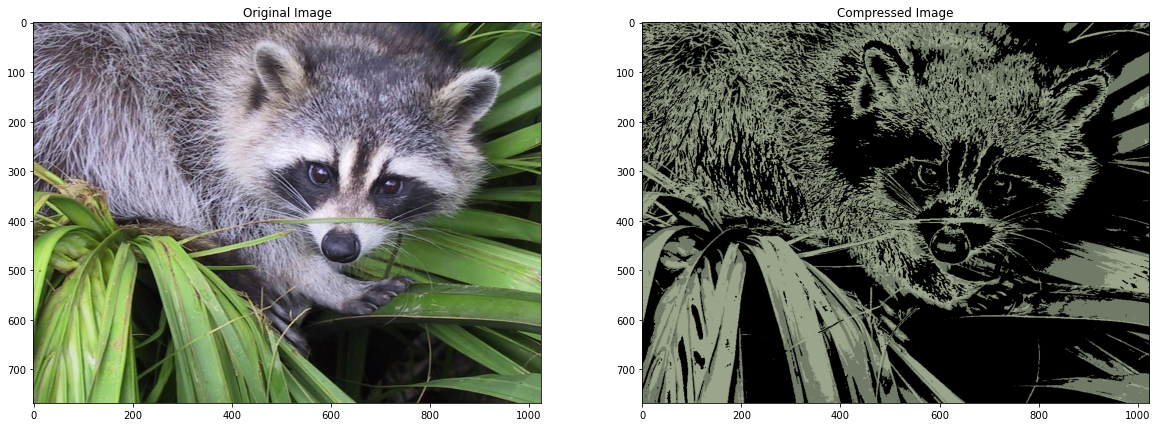

In [240]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,20))
ax1.imshow(image)
ax1.set_title("Original Image")
ax2.imshow(compressed_image)
ax2.set_title("Compressed Image")